### Project 1 - Analysing Seattle and Boston Airbnb datasets
#### In this project we will try to answer this 4 folowing questions:
1) When is there more (or less) availability in Boston and Seattle? Is there a difference between the two cities?<br>
2) When is it cheaper to stay in Boston or Seattle? Is there a difference between the two cities?<br>
3) Do neighborhoods influence prices? And the score rating?<br>
4) What features do the top rated (score rating +90) properties have in common? What is different from the other properties?

#### In this notebook, we will answer 3) questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import data
df_boston_listings = pd.read_csv('./airbnb-boston/listings.csv')
df_seattle_listings = pd.read_csv('./airbnb-seattle/listings.csv')

#### Analyzing Boston data:

In [3]:
# looking into data
df_boston_listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


In [4]:
df_boston_listings[['id','neighbourhood_cleansed','review_scores_rating','price']].describe(include='all')

,id,neighbourhood_cleansed,review_scores_rating,price
count,3.585000e+03,3585,2772.000000,3585
unique,NaN,25,NaN,324
top,NaN,Jamaica Plain,NaN,$150.00
freq,NaN,343,NaN,144
mean,8.440875e+06,NaN,91.916667,NaN
std,4.500787e+06,NaN,9.531686,NaN
min,3.353000e+03,NaN,20.000000,NaN
25%,4.679319e+06,NaN,89.000000,NaN
50%,8.577620e+06,NaN,94.000000,NaN
75%,1.278953e+07,NaN,98.250000,NaN


In [5]:
# filter dataframe keeping the columns that are interesting 
df_boston_values = df_boston_listings[['review_scores_rating','neighbourhood_cleansed','price']]
df_boston_values = df_boston_values.fillna(0)

In [6]:
# convert price in float
df_boston_values['price'] = df_boston_values['price'].str.replace(',','').str.replace('$','').astype('float')
df_boston_values.dtypes

review_scores_rating      float64
neighbourhood_cleansed     object
price                     float64
dtype: object

In [7]:
# calculate the average price of properties by neighbourhood
df_neighbour_boston = df_boston_values[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean()
df_neighbour_boston.head()

,price
neighbourhood_cleansed,
Allston,112.307692
Back Bay,240.950331
Bay Village,266.833333
Beacon Hill,224.443299
Brighton,118.767568


In [8]:
# create a column with the average price of dataset for comparison
df_neighbour_boston['mean'] = df_boston_values['price'].mean()

In [9]:
df_neighbour_boston=df_neighbour_boston.sort_values(by='price', ascending=False)

<Figure size 432x288 with 0 Axes>

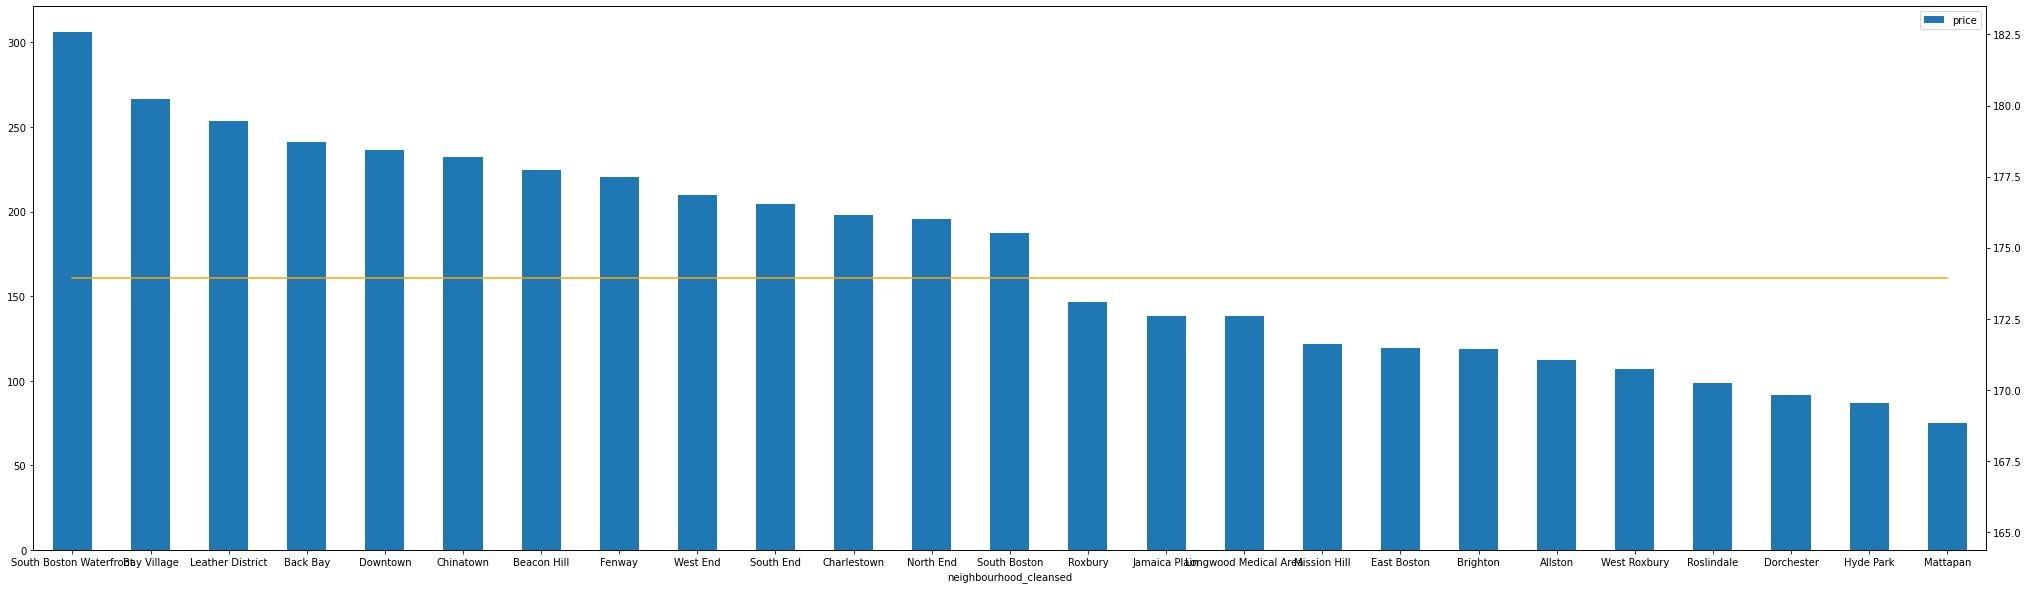

In [10]:
fig = plt.figure()
ax = df_neighbour_boston[['price']].plot(figsize=(35,10), kind='bar')
plt.xticks(rotation=0)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_neighbour_boston[['mean']], color='orange')
plt.show()

In [11]:
# create a column with the percentage difference between the average price by neighbourhood and the average price of dataset
df_neighbour_boston['percent'] = (df_neighbour_boston['price']/df_neighbour_boston['mean'])-1
# look at the highest positive difference
df_neighbour_boston.head(1)

,price,mean,percent
neighbourhood_cleansed,,,
South Boston Waterfront,306.060241,173.925802,0.759717


In [12]:
# look at the highest negative difference
df_neighbour_boston.tail(1)

,price,mean,percent
neighbourhood_cleansed,,,
Mattapan,75.125,173.925802,-0.568063


- We can see that the average prices vary according to the neighborhood
- We have 13 neighborhoods with an average price above the Boston average and 12 neighborhoods with an average price below the Boston average
- The neighborhood with the highest average price is South Boston Waterfront costing an average of \$ 306, which is 76\% higher than the Boston average
- The neighborhood with the lowest average price is Mattapan costing an average of \$ 75, which is 57\% less than the Boston average

In [13]:
# filter dataframe keeping the columns that are interesting 
df_scores_boston = df_boston_values[['review_scores_rating','price']]
df_scores_boston.head()

,review_scores_rating,price
0,0.0,250.0
1,94.0,65.0
2,98.0,65.0
3,100.0,75.0
4,99.0,79.0


<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

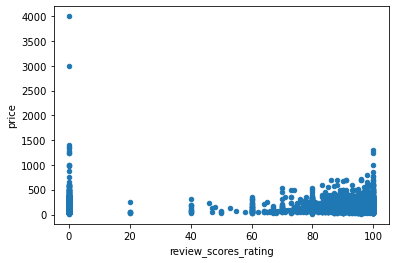

In [14]:
df_scores_boston.plot.scatter(x='review_scores_rating', y='price')

<AxesSubplot:xlabel='review_scores_rating'>

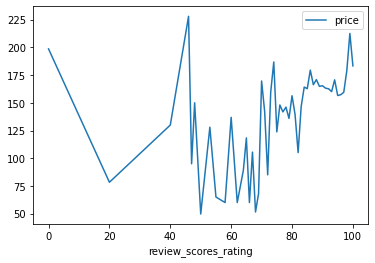

In [15]:
df_scores_boston.groupby('review_scores_rating').mean().plot.line()

- We can see that there is no significant correlation between the score rating and the prices
- The highest average prices are not in the best rated places

#### Analyzing Seattle data:

In [16]:
# looking into data
df_seattle_listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [17]:
df_seattle_listings[['id','neighbourhood_cleansed','review_scores_rating','price']].describe(include='all')

,id,neighbourhood_cleansed,review_scores_rating,price
count,3.818000e+03,3818,3171.000000,3818
unique,NaN,87,NaN,273
top,NaN,Broadway,NaN,$150.00
freq,NaN,397,NaN,162
mean,5.550111e+06,NaN,94.539262,NaN
std,2.962660e+06,NaN,6.606083,NaN
min,3.335000e+03,NaN,20.000000,NaN
25%,3.258256e+06,NaN,93.000000,NaN
50%,6.118244e+06,NaN,96.000000,NaN
75%,8.035127e+06,NaN,99.000000,NaN


In [18]:
# filter dataframe keeping the columns that are interesting 
df_seattle_values = df_seattle_listings[['review_scores_rating','neighbourhood_cleansed','price']]
df_seattle_values = df_seattle_values.fillna(0)

In [19]:
# convert price in float
df_seattle_values['price'] = df_seattle_values['price'].str.replace(',','').str.replace('$','').astype('float')
df_seattle_values.dtypes

review_scores_rating      float64
neighbourhood_cleansed     object
price                     float64
dtype: object

In [20]:
# calculate the average price of properties by neighbourhood
df_neighbour_seattle = df_seattle_values[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean()
df_neighbour_seattle.head()

,price
neighbourhood_cleansed,
Adams,121.671429
Alki,171.619048
Arbor Heights,126.800000
Atlantic,111.396226
Belltown,162.893162


In [21]:
# create a column with the average price of dataset for comparison
df_neighbour_seattle['mean'] = df_neighbour_seattle['price'].mean()

In [22]:
df_neighbour_seattle=df_neighbour_seattle.sort_values(by='price', ascending=False)

<Figure size 432x288 with 0 Axes>

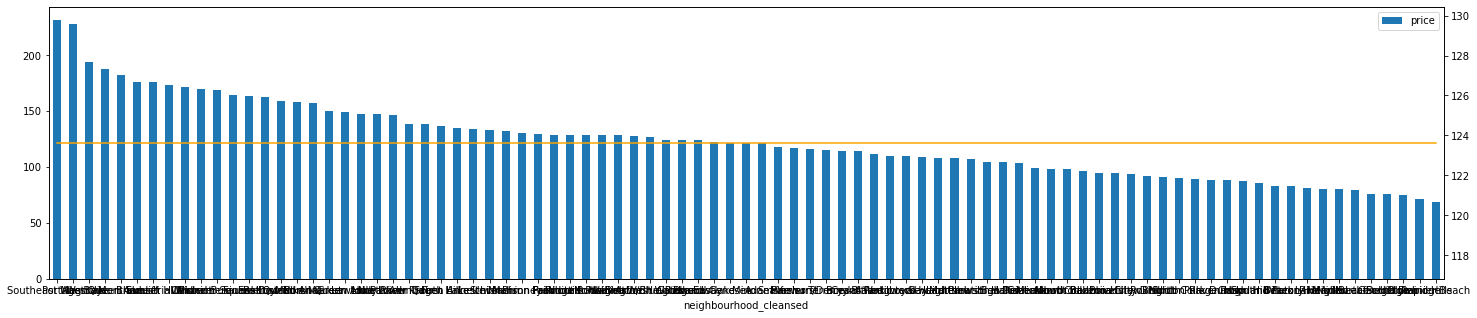

In [23]:
fig = plt.figure()
ax = df_neighbour_seattle[['price']].plot(figsize=(25,5), kind='bar')
plt.xticks(rotation=0)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_neighbour_seattle[['mean']], color='orange')
plt.show()

In [24]:
# create a column with the percentage difference between the average price by neighbourhood and the average price of dataset
df_neighbour_seattle['percent'] = (df_neighbour_seattle['price']/df_neighbour_seattle['mean'])-1
# look at the highest positive difference
df_neighbour_seattle.head(2)

,price,mean,percent
neighbourhood_cleansed,,,
Southeast Magnolia,231.705882,123.623676,0.874284
Portage Bay,227.857143,123.623676,0.843151


In [25]:
# look at the highest negative difference
df_neighbour_seattle.tail(4)

,price,mean,percent
neighbourhood_cleansed,,,
Georgetown,76.125000,123.623676,-0.384220
South Delridge,74.666667,123.623676,-0.396016
Olympic Hills,71.687500,123.623676,-0.420115
Rainier Beach,68.555556,123.623676,-0.445450


In [26]:
# look the number of neighbourhoods with average prices higher than the average price of Seattle
len(df_neighbour_seattle[df_neighbour_seattle['price']>df_neighbour_seattle['mean']])

41

In [27]:
# look the number of neighbourhoods with average prices lower than the average price of Seattle
len(df_neighbour_seattle[df_neighbour_seattle['price']<df_neighbour_seattle['mean']])

46

- We can see that the average prices also vary according to the neighborhood
- We have 41 neighborhoods with an average price above the Seattle average and 46 neighborhoods with an average price below the Seattle average
- The neighborhoods with the highest average prices are Southeast Magnolia and Portage Bay, costing on average \ $ 231 and \ $ 227, and are 87 \% and 84 \% higher than the Seattle average respectively
- The neighborhood with the lowest average price is Rainier Beach costing an average of \ $ 68, which is 44 \% less than the Seattle average

In [28]:
# filter dataframe keeping the columns that are interesting 
df_scores_seattle = df_seattle_values[['review_scores_rating','price']]
df_scores_seattle.head()

,review_scores_rating,price
0,95.0,85.0
1,96.0,150.0
2,97.0,975.0
3,0.0,100.0
4,92.0,450.0


<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

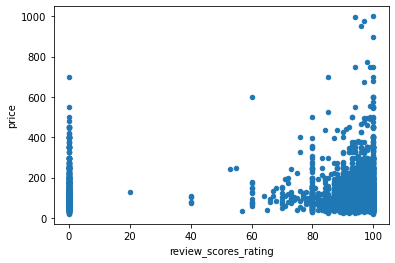

In [29]:
df_scores_seattle.plot.scatter(x='review_scores_rating', y='price')

<AxesSubplot:xlabel='review_scores_rating'>

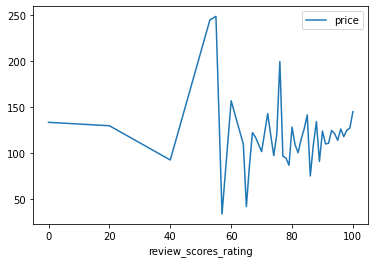

In [30]:
df_scores_seattle.groupby('review_scores_rating').mean().plot.line()

- We can see that there is no significant correlation between the score rating and the prices
- The highest average prices are not in the best rated places

#### Comparing Boston and Seattle:

- Both have differences in the average price depending on the neighborhood
- Seattle has many more neighborhoods than Boston
- The average price in the most expensive neighborhoods is between 3 and 4 times higher than in the cheapest neighborhoods
- In none of the cities is there a significant correlation between the score rating and prices.